In [1]:
#data loading
import pandas as pd
filename="/content/social_insure.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames   address  village  takeup_survey   age  agpop  ricearea_2010  \
0            1  beilian2  beilian              0  62.0    2.0           10.0   
1            2  beilian2  beilian              1  63.0    5.0           15.0   
2            3  beilian2  beilian              1  44.0    3.0            7.5   
3            4  beilian2  beilian              1  76.0    6.0            NaN   
4            5  beilian2  beilian              0  52.0    6.0           11.0   
...        ...       ...      ...            ...   ...    ...            ...   
1405      1406     zixi5     zixi              1  41.0    4.0            8.4   
1406      1407     zixi5     zixi              0  60.0    3.0           20.0   
1407      1408     zixi9     zixi              1  73.0    2.0            4.0   
1408      1409     zixi9     zixi              0  66.0    6.0           10.0   
1409      1410     zixi9     zixi              0  72.0    2.0            8.0   

      disaster_prob  male  Decision_toI

In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
address,0
village,0
takeup_survey,0
age,4
agpop,6
ricearea_2010,9
disaster_prob,0
male,3
Decision_toInsure,0


In [3]:
fillIntColumns={4,5,6,8,12}
for x in fillIntColumns:
    a[a.columns[x]]=a[a.columns[x]].fillna(a[a.columns[x]].mean())

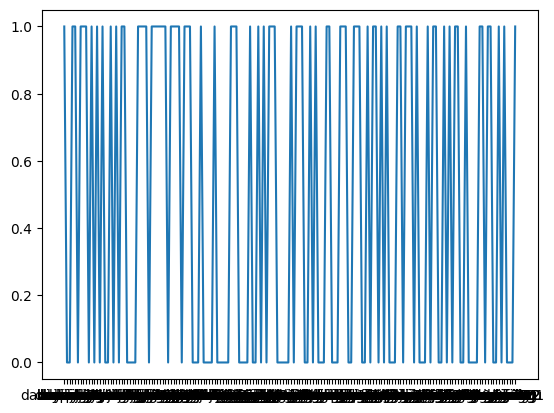

In [5]:
from matplotlib import pyplot as plt
target="Decision_toInsure"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 1410 artists>

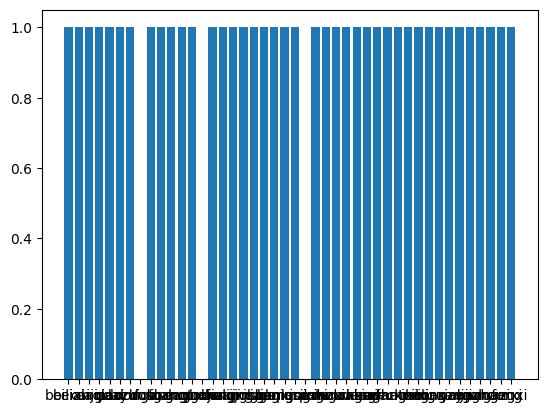

In [6]:
plt.bar(a[a.columns[2]],a[str(target)])

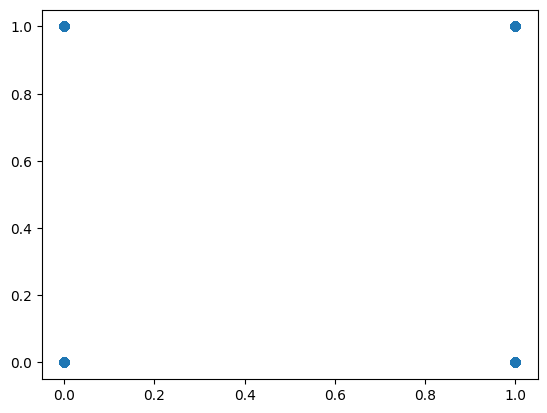

In [7]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [10]:
from sklearn.preprocessing import LabelEncoder

b=LabelEncoder()


#transform string into int
transformColumns={1,2}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  address  village  takeup_survey   age  agpop  ricearea_2010  \
0            1        0        0              0  62.0    2.0      10.000000   
1            2        0        0              1  63.0    5.0      15.000000   
2            3        0        0              1  44.0    3.0       7.500000   
3            4        0        0              1  76.0    6.0      13.429422   
4            5        0        0              0  52.0    6.0      11.000000   
...        ...      ...      ...            ...   ...    ...            ...   
1405      1406      164       43              1  41.0    4.0       8.400000   
1406      1407      164       43              0  60.0    3.0      20.000000   
1407      1408      165       43              1  73.0    2.0       4.000000   
1408      1409      165       43              0  66.0    6.0      10.000000   
1409      1410      165       43              0  72.0    2.0       8.000000   

      disaster_prob  male  Decision_toInsure  inten

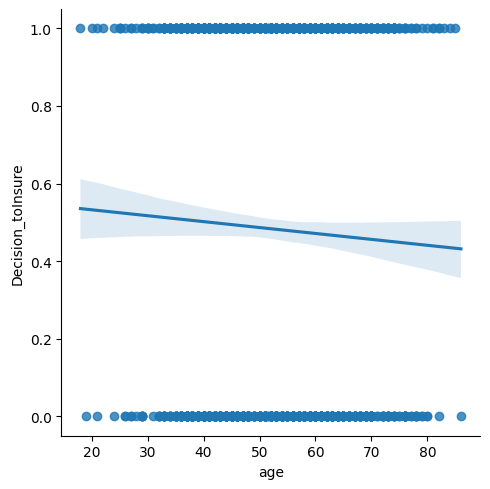

In [11]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="age",y=str(target),data=a)

<Axes: xlabel='agpop', ylabel='Decision_toInsure'>

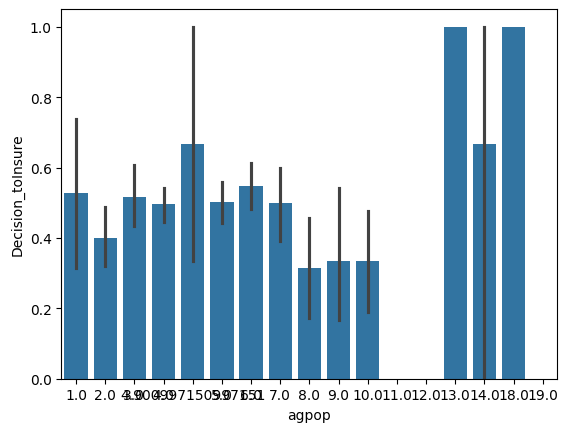

In [12]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='village', ylabel='Decision_toInsure'>

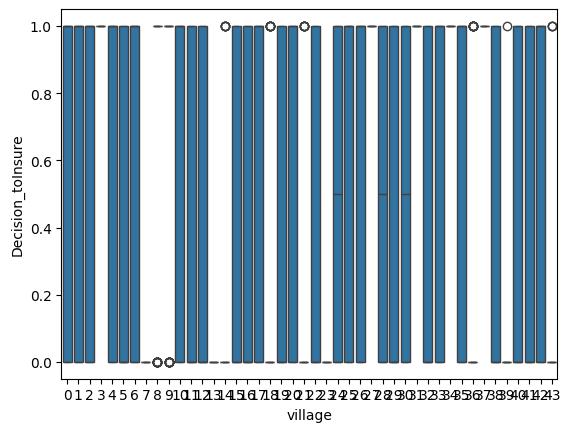

In [14]:
sns.boxplot(x=a.columns[2],y=str(target),data=a)

<ipython-input-15-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='Decision_toInsure', ylabel='Density'>

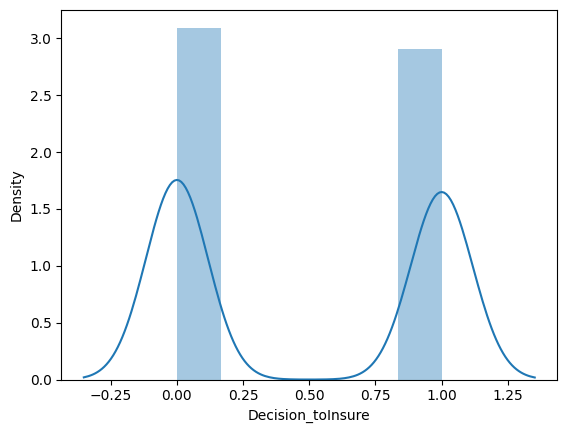

In [15]:
sns.distplot(a[str(target)])

<Axes: xlabel='address', ylabel='Density'>

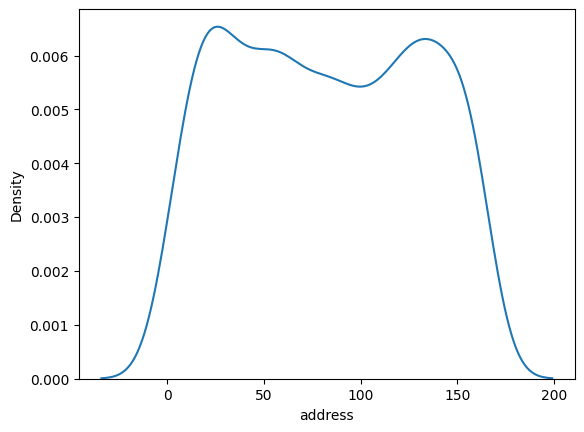

In [16]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='age', ylabel='count'>

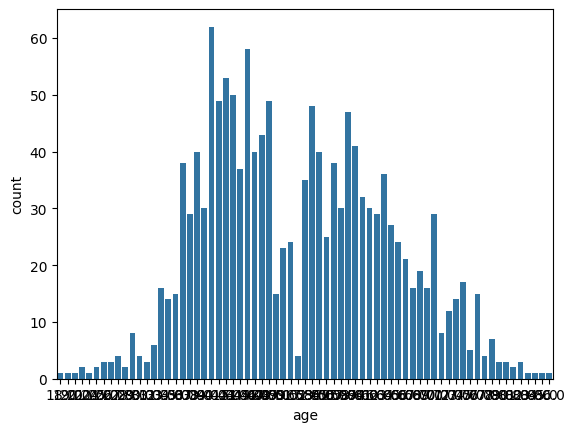

In [17]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

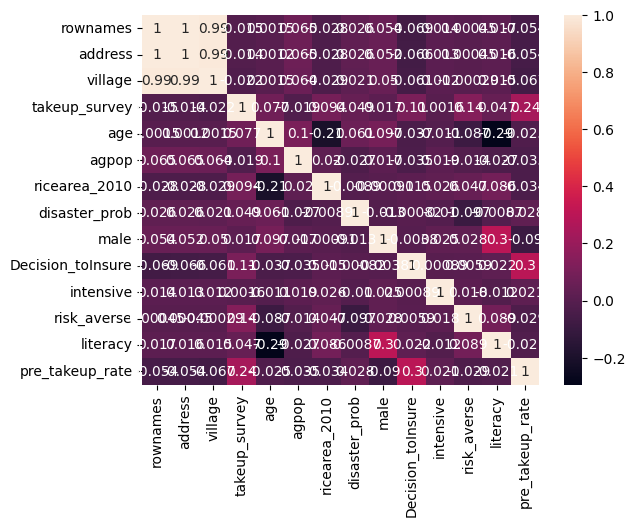

In [19]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

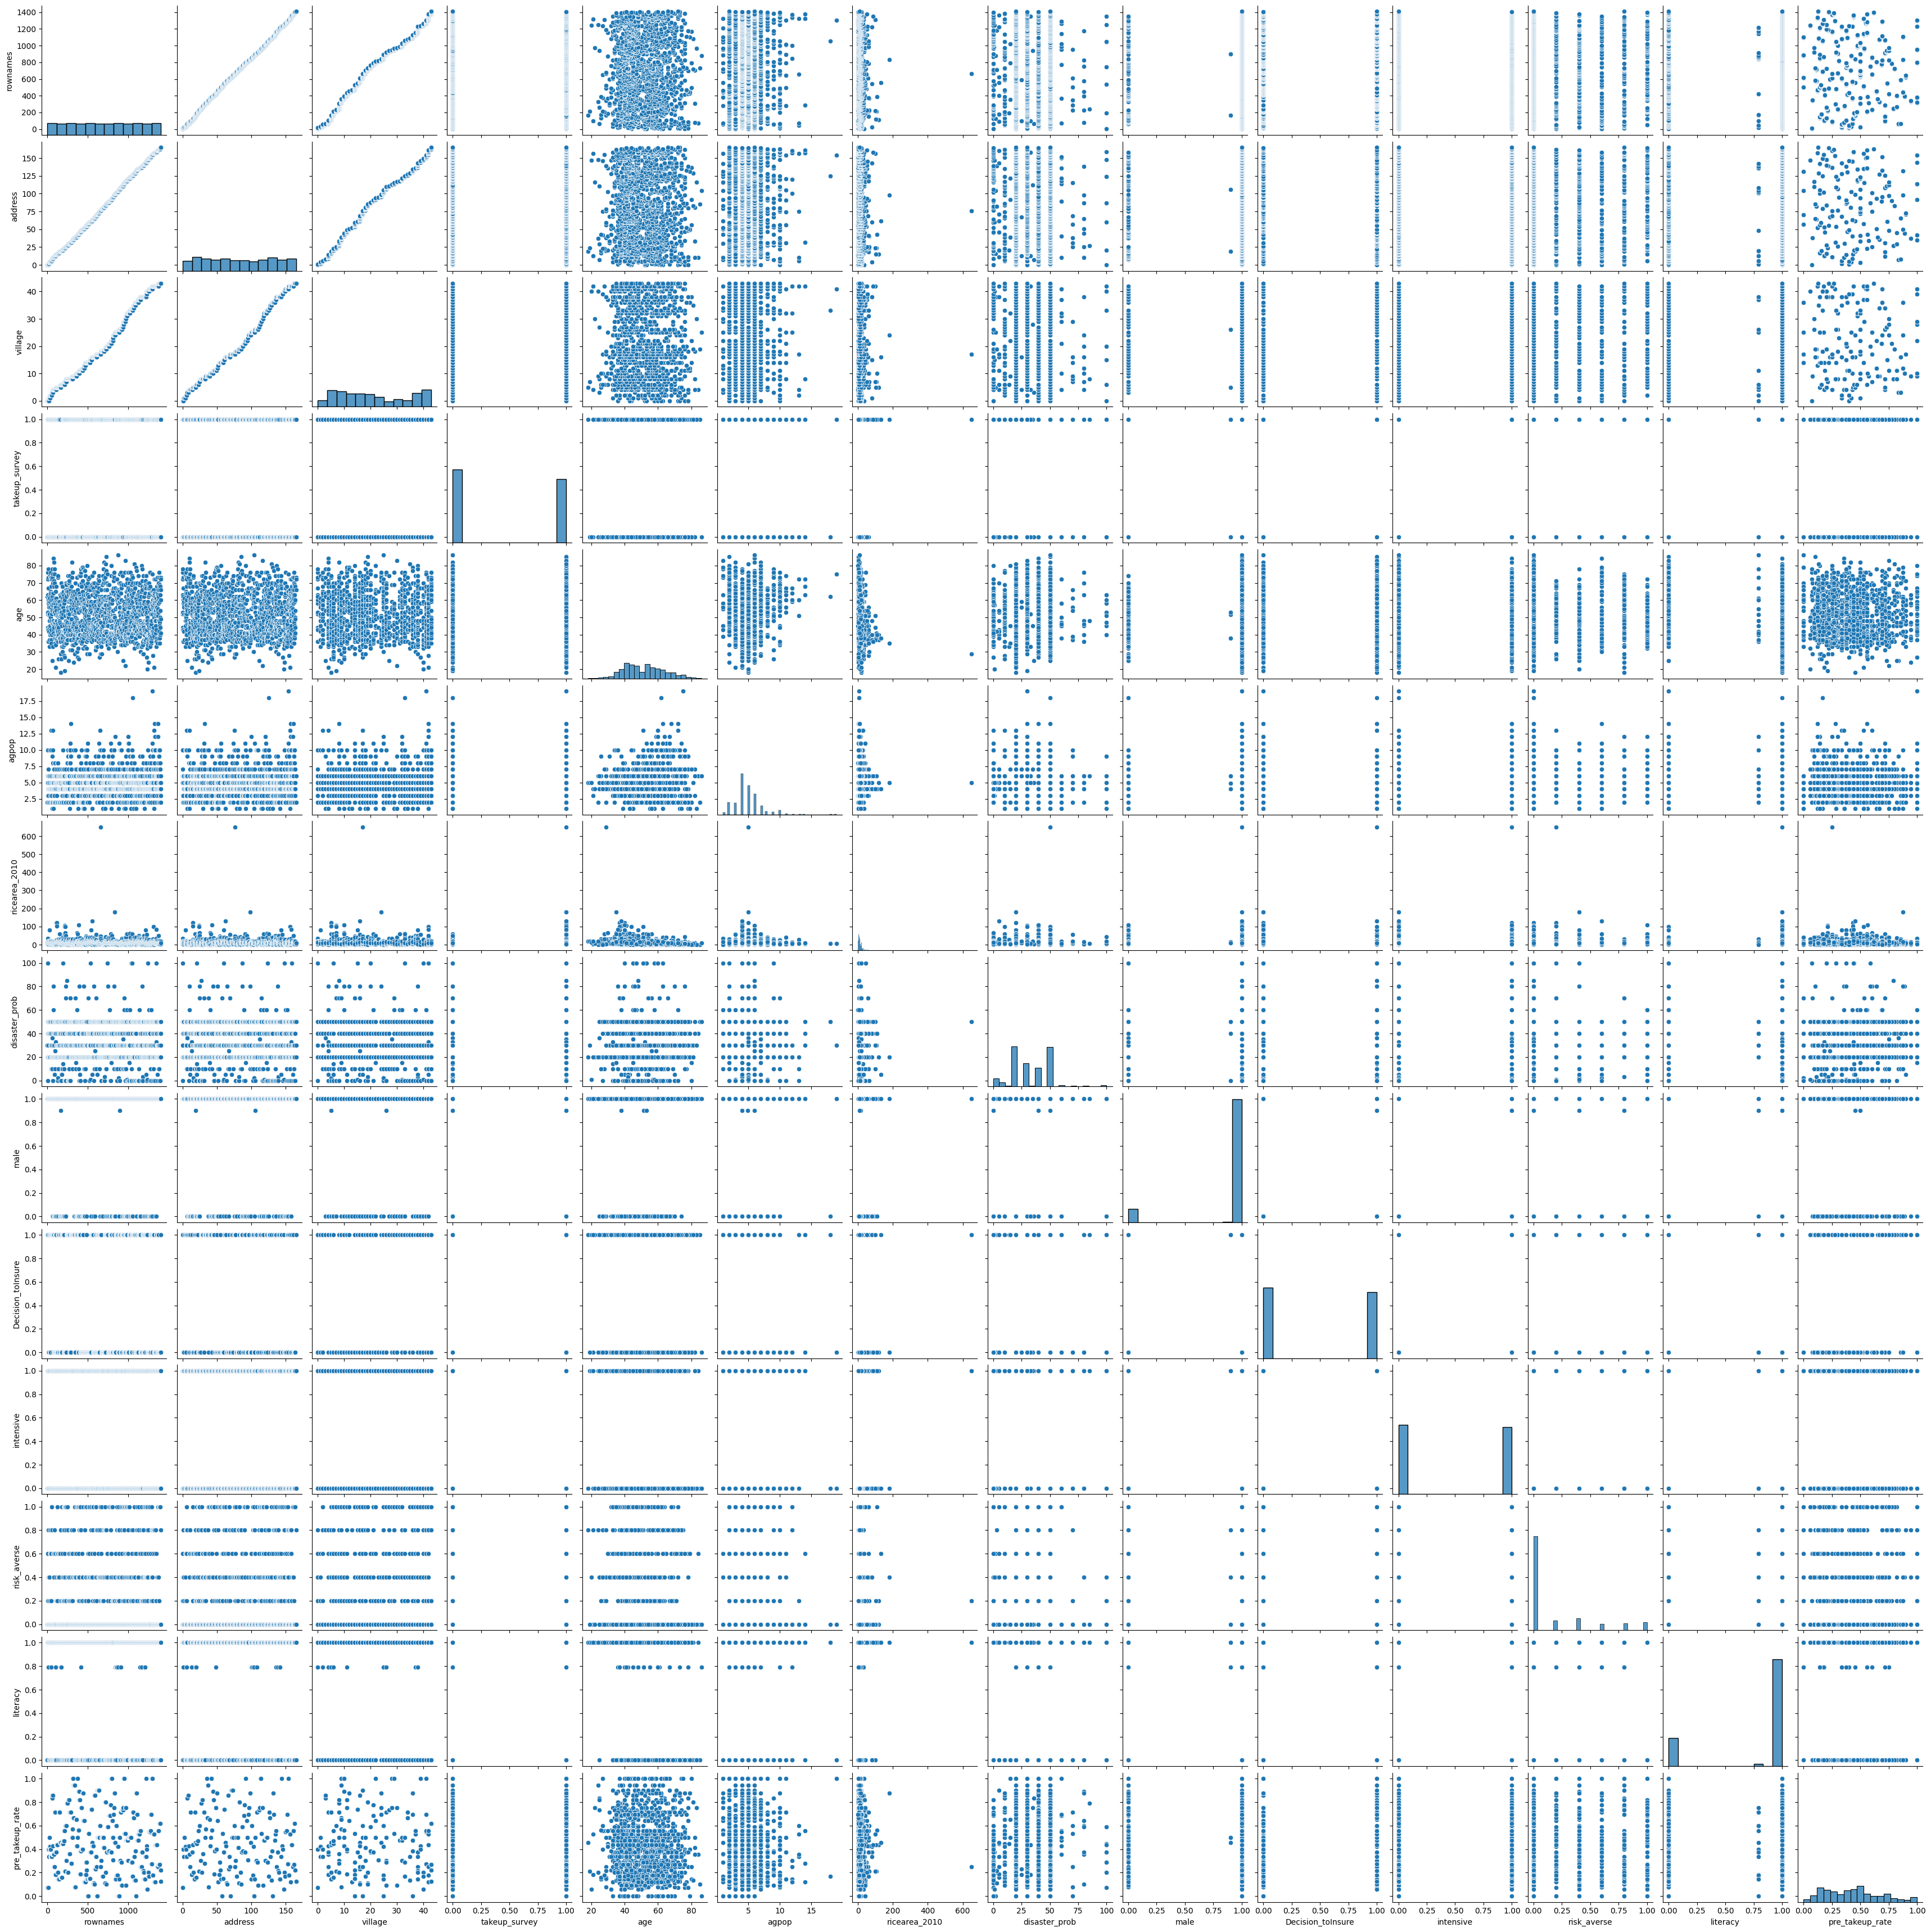

In [20]:
sns.pairplot(data=a)

In [21]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  address  village  takeup_survey   age  agpop  ricearea_2010  \
0            1        0        0              0  62.0    2.0      10.000000   
1            2        0        0              1  63.0    5.0      15.000000   
2            3        0        0              1  44.0    3.0       7.500000   
3            4        0        0              1  76.0    6.0      13.429422   
4            5        0        0              0  52.0    6.0      11.000000   
...        ...      ...      ...            ...   ...    ...            ...   
1405      1406      164       43              1  41.0    4.0       8.400000   
1406      1407      164       43              0  60.0    3.0      20.000000   
1407      1408      165       43              1  73.0    2.0       4.000000   
1408      1409      165       43              0  66.0    6.0      10.000000   
1409      1410      165       43              0  72.0    2.0       8.000000   

      disaster_prob  male  intensive  risk_averse  

In [22]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
1405    0
1406    0
1407    1
1408    1
1409    1
Name: Decision_toInsure, Length: 1410, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
print(x_train)

      rownames  address  village  takeup_survey        age     agpop  \
1271      1272      150       41              1  76.000000  2.000000   
849        850      100       25              0  39.000000  4.000000   
766        767       89       21              1  37.000000  4.000000   
1163      1164      137       38              1  43.000000  5.000000   
986        987      118       31              1  56.000000  4.000000   
...        ...      ...      ...            ...        ...       ...   
162        163       19        5              1  51.480797  4.900997   
543        544       61       15              1  43.000000  4.000000   
72          73       10        4              0  43.000000  4.000000   
1285      1286      152       41              1  57.000000  5.000000   
794        795       92       22              1  64.000000  2.000000   

      ricearea_2010  disaster_prob     male  intensive  risk_averse  literacy  \
1271            5.0           50.0  1.00000          1

In [25]:
print(y_train)

1271    0
849     0
766     0
1163    0
986     1
       ..
162     1
543     1
72      1
1285    1
794     1
Name: Decision_toInsure, Length: 1128, dtype: int64


In [26]:
print(x_test)

      rownames  address  village  takeup_survey   age  agpop  ricearea_2010  \
1311      1312      155       42              1  28.0    7.0           30.0   
291        292       32        8              1  68.0    3.0            3.4   
762        763       88       20              0  53.0    5.0           10.0   
1018      1019      122       32              1  47.0    4.0            6.0   
1033      1034      123       33              0  45.0    5.0           10.0   
...        ...      ...      ...            ...   ...    ...            ...   
808        809       94       22              1  51.0    3.0           12.0   
350        351       39        9              1  36.0    4.0            2.5   
135        136       17        5              0  44.0    4.0           12.0   
910        911      108       26              1  49.0    6.0           10.0   
653        654       75       17              0  60.0    7.0           12.0   

      disaster_prob  male  intensive  risk_averse  

In [27]:
print(y_test)

1311    1
291     1
762     0
1018    1
1033    1
       ..
808     0
350     1
135     1
910     1
653     1
Name: Decision_toInsure, Length: 282, dtype: int64


In [28]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print(ypred)

[1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0]


In [30]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.6134751773049646


In [31]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[104  47]
 [ 62  69]]


In [33]:
print(model.predict([[1312,155,42,1,28.0,7.0,30.0,50.0,1.0,0,0.0,1.0,0.176471]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [35]:
print(ypred)

[1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1]


In [36]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9539007092198581


In [37]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[140  11]
 [  2 129]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       151
           1       0.92      0.98      0.95       131

    accuracy                           0.95       282
   macro avg       0.95      0.96      0.95       282
weighted avg       0.96      0.95      0.95       282



In [39]:
print(model.predict([[1312,155,42,1,28.0,7.0,30.0,50.0,1.0,0,0.0,1.0,0.176471]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [41]:
print(ypred)

[1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0
 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1]


In [43]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.925531914893617


In [42]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[142   9]
 [ 12 119]]


In [44]:
print(model.predict([[1312,155,42,1,28.0,7.0,30.0,50.0,1.0,0,0.0,1.0,0.176471]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       151
           1       0.93      0.91      0.92       131

    accuracy                           0.93       282
   macro avg       0.93      0.92      0.93       282
weighted avg       0.93      0.93      0.93       282

